# Chapter 4. 데이터 시각화

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# 1. 복습 문제

## 1번
seaborn의 fligts 데이터셋을 불러와서 시각화하세요.  
왼쪽은 년도별 승객수를 막대그래프로 표현하고, 오른쪽은 월별 승객수를 꺾은선 그래프로 표현하세요.

In [2]:
data = sns.load_dataset('flights')
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
import warnings
warnings.filterwarnings('ignore')

### My Answer

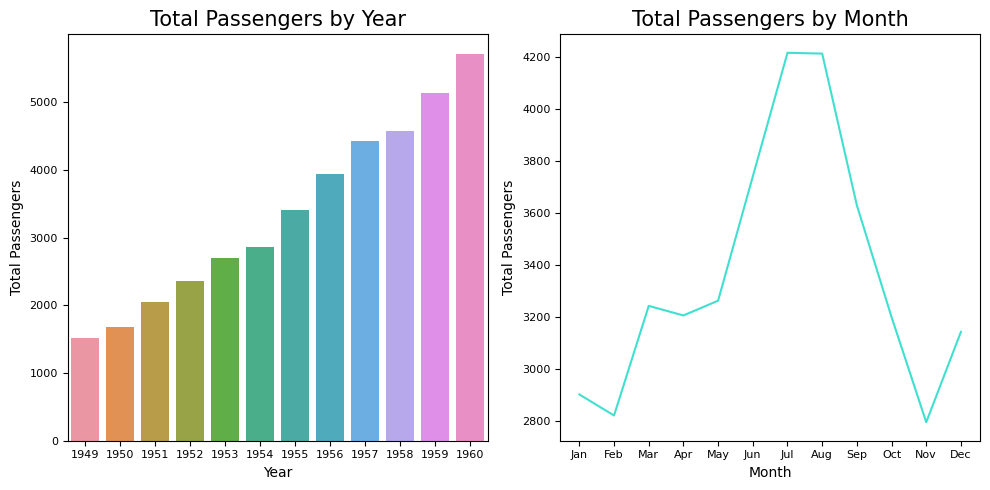

In [4]:
bar_data = data.groupby('year').sum()
line_data = data.groupby('month').sum()

plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.barplot(x = bar_data.index, y = bar_data['passengers'])
plt.title('Total Passengers by Year', fontsize = 15)
plt.xlabel('Year', fontsize = 10)
plt.xticks(fontsize = 8)
plt.ylabel('Total Passengers', fontsize = 10)
plt.yticks(fontsize = 8)

plt.subplot(1,2,2)
sns.lineplot(x = line_data.index, y = line_data['passengers'], color = 'turquoise')
plt.title('Total Passengers by Month', fontsize = 15)
plt.xlabel('Month', fontsize = 10)
plt.xticks(fontsize = 8)
plt.ylabel('Total Passengers', fontsize = 10)
plt.yticks(fontsize = 8)

plt.tight_layout()
plt.show()

### Answer

Text(0.5, 0, 'Total Passengers by Month')

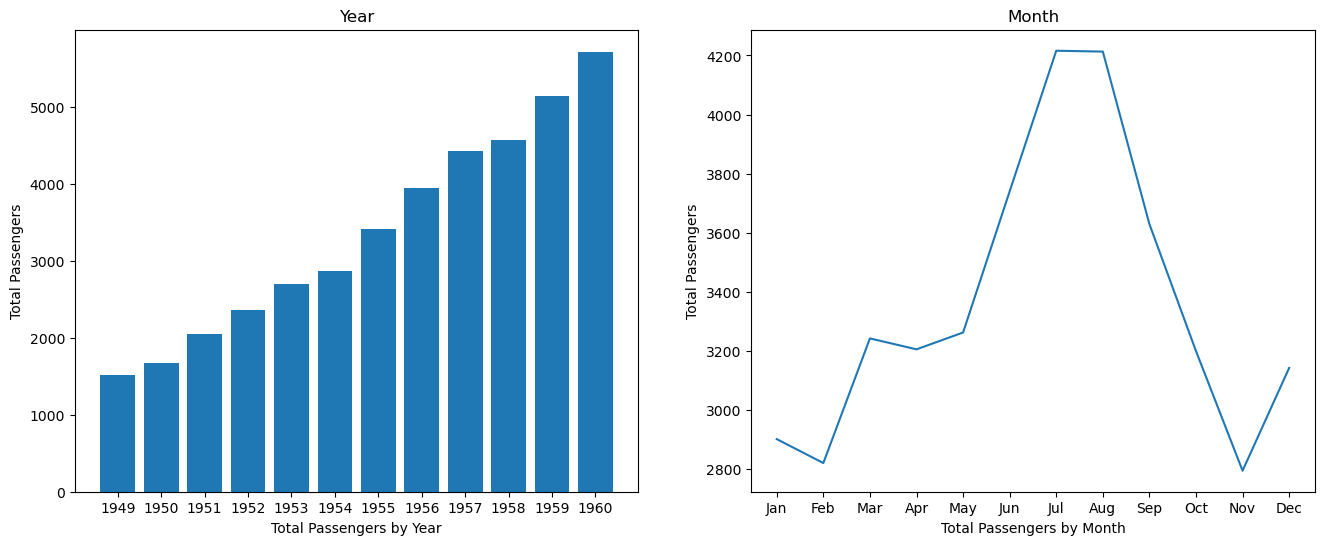

In [5]:
bar_data = data.groupby('year')['passengers'].sum()
line_data = data.groupby('month')['passengers'].sum()

fig = plt.figure(figsize = (16,6))

ax1 = fig.add_subplot(1,2,1)
ax1.bar(bar_data.index, bar_data, tick_label = bar_data.index)
ax1.set_title('Year')
ax1.set_ylabel('Total Passengers')
ax1.set_xlabel('Total Passengers by Year')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(line_data.index, line_data)
ax2.set_title('Month')
ax2.set_ylabel('Total Passengers')
ax2.set_xlabel('Total Passengers by Month')

## 2번
1번
seaborn의 penguins 데이터셋을 불러와서 산점도를 작성하세요.

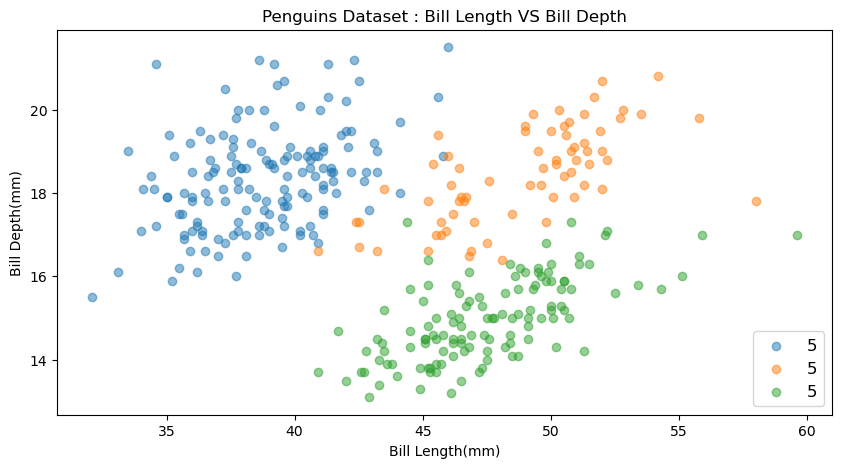

In [6]:
data = sns.load_dataset('penguins')
species = data['species'].unique()

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)

for s in species :
    x = data.loc[data['species'] == s, 'bill_length_mm']
    y = data.loc[data['species'] == s, 'bill_depth_mm']
    ax.scatter(x, y, alpha = 0.5, label = 5)
    
ax.set_title('Penguins Dataset : Bill Length VS Bill Depth')
ax.set_xlabel('Bill Length(mm)')
ax.set_ylabel('Bill Depth(mm)')
ax.legend(loc = 'lower right', fontsize = 12)

## 3번
아래의 임의의 배열을 활용하여 막대그래프를 작성하세요.

In [7]:
import numpy as np
import pandas as pd

In [8]:
x = [1, 2]
y1, y2, y3 = [[1,2],[2,4],[3,6]]

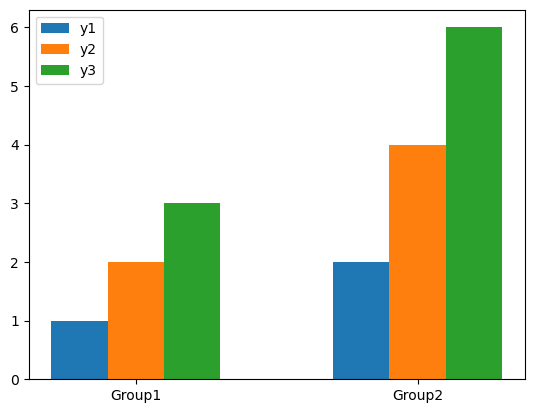

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

w = 0.2

ax.bar(x, y1, width = w, label = 'y1')
ax.bar(np.array(x) + w, y2, width = w, label = 'y2')
ax.bar(np.array(x) + w * 2, y3, width = w, label = 'y3')

group_position = np.array(x) + w
ax.set_xticks(group_position)

labels = ['Group1','Group2']
ax.set_xticklabels(labels)

ax.legend()
plt.show()

## 4번
주성분 분석 후 산점도를 작성하세요.

In [10]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [11]:
raw_data = load_digits()
raw_data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [12]:
# 정규화
data = raw_data.data / 16.0

# PCA
pca = PCA(n_components = 2)
reduced_data = pca.fit_transform(data)

# 결과 확인
reduced_data

array([[-0.07871668,  1.32968035],
       [ 0.49735057, -1.2980436 ],
       [ 0.43699529, -0.62224934],
       ...,
       [ 0.67508017, -0.43501597],
       [-0.30450592,  0.77649778],
       [-0.02152426,  0.39784662]])

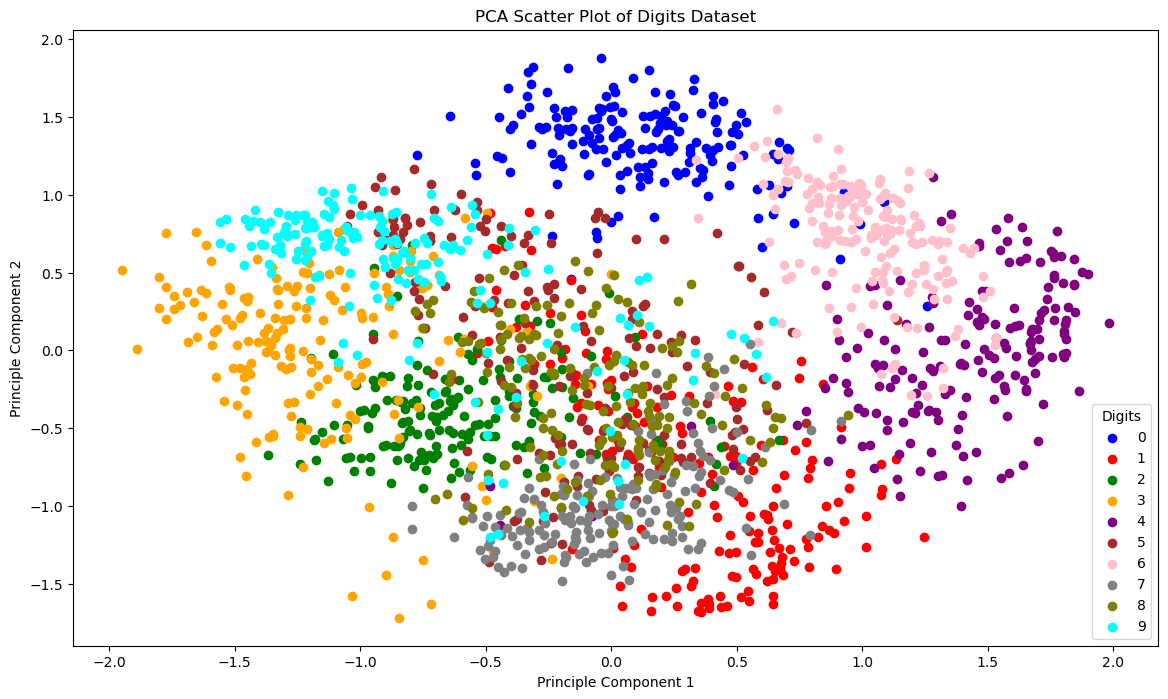

In [13]:
# Scatter Plot
fig = plt.figure(figsize = (14,8))

ax = fig.add_subplot(1,1,1)

colors = ['b','r','g','orange','purple','brown','pink','gray','olive','cyan']

for i in range(10) :
    ax.scatter(reduced_data[raw_data.target == i, 0],
               reduced_data[raw_data.target == i, 1],
               color = colors[i],
               label = str(i))

ax.set_title('PCA Scatter Plot of Digits Dataset')
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')

plt.legend(loc = 'lower right', title = 'Digits')
plt.show()

# 2. Seaborn

## Histogram

<AxesSubplot: xlabel='age', ylabel='Count'>

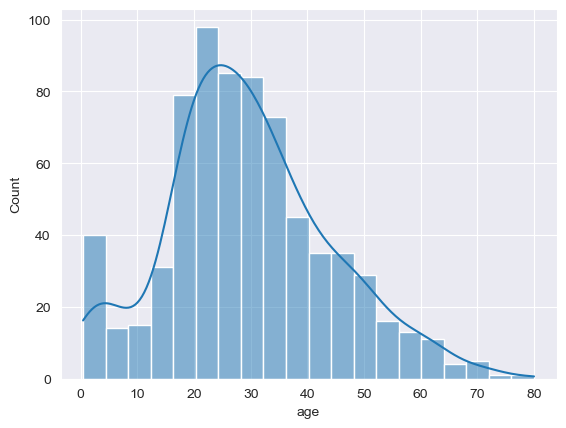

In [14]:
data = sns.load_dataset('titanic')

sns.set_style('darkgrid')
sns.histplot(x = 'age', data = data, palette = 'Paired', kde = True)

### 예제

<AxesSubplot: xlabel='petal_length', ylabel='Count'>

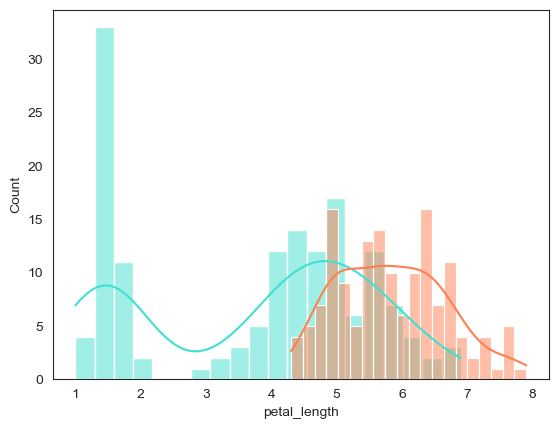

In [18]:
data = sns.load_dataset('iris')

sns.set_style('white')

sns.histplot(x = 'petal_length', data = data,
             palette = 'Paired', kde = True, alpha = 0.5, bins = 20, color = 'turquoise')
sns.histplot(x = 'sepal_length', data = data,
             palette = 'Paired', kde = True, alpha = 0.5, bins = 20, color = 'coral')

## Scatter Plot

Text(0, 0.5, 'Tip')

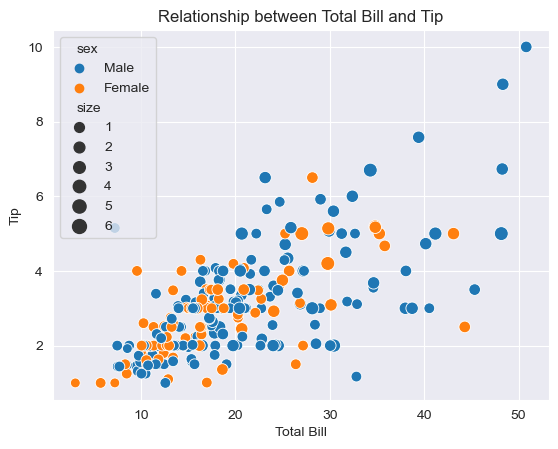

In [15]:
data = sns.load_dataset('tips')

sns.scatterplot(x = 'total_bill', y = 'tip', data = data,
                hue = 'sex', size = 'size', sizes = (50,100))
plt.title('Relationship between Total Bill and Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

## Line Plot

Text(0.5, 1.0, 'Changes in Signal Intersive over Time')

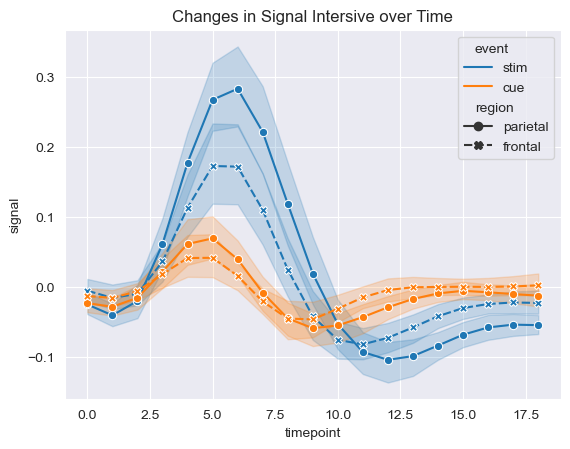

In [16]:
data = sns.load_dataset('fmri')

sns.lineplot(x = 'timepoint', y = 'signal', data = data,
             hue = 'event', style = 'region', markers = True)
plt.title('Changes in Signal Intersive over Time')

## Bar Plot

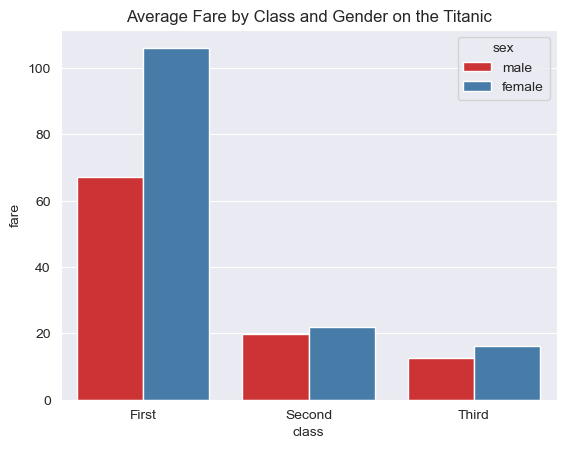

In [17]:
data = sns.load_dataset('titanic')

sns.barplot(x = 'class', y = 'fare', data = data,
            ci = None, hue = 'sex', palette = 'Set1')
plt.title('Average Fare by Class and Gender on the Titanic')

plt.show()

## Kde Plot

Text(0.5, 1.0, 'Density Plot of Toatl Bill by Meal Time')

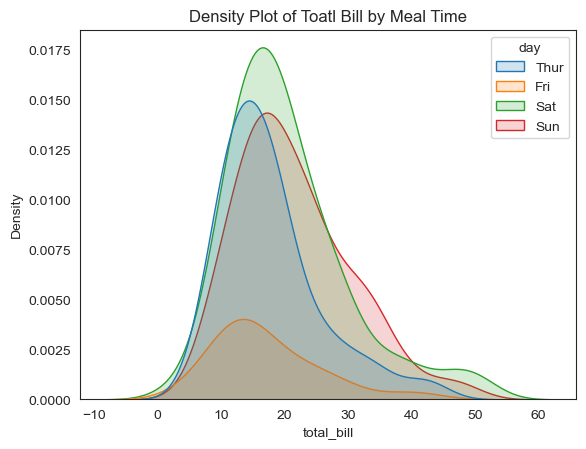

In [19]:
data = sns.load_dataset('tips')

sns.kdeplot(x = 'total_bill', data = data, hue = 'day',
            fill = True, alpha = 0.2)
plt.title('Density Plot of Toatl Bill by Meal Time')

## Box Plot

Text(0.5, 1.0, 'Box Plot of Total Bill by Day and Meal Time')

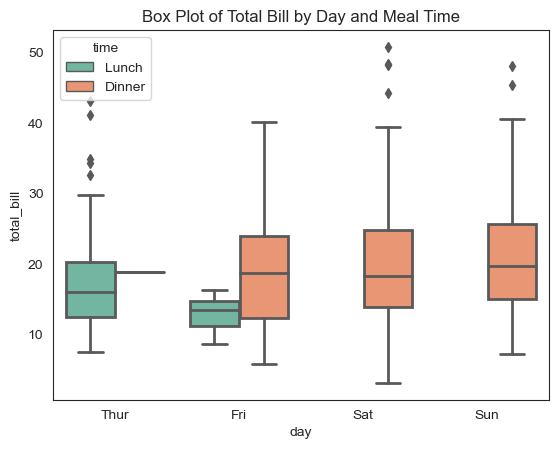

In [20]:
data = sns.load_dataset('tips')

sns.boxplot(x = 'day', y = 'total_bill', data = data,
            hue = 'time', palette = 'Set2', linewidth = 2)
plt.title('Box Plot of Total Bill by Day and Meal Time')

## Heatmap

<AxesSubplot: xlabel='size', ylabel='day'>

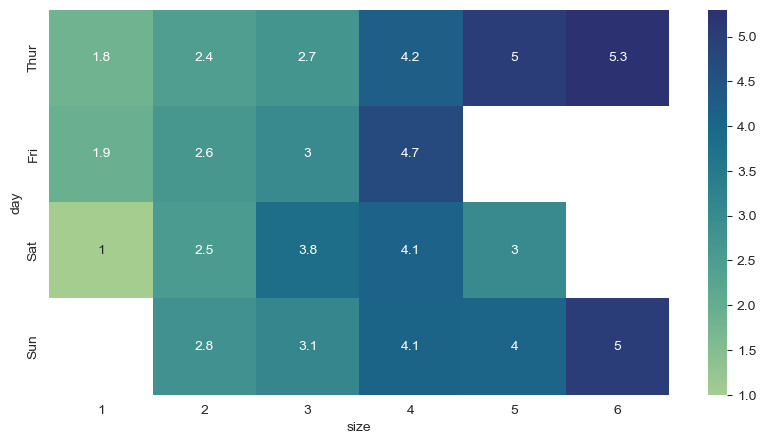

In [21]:
data = sns.load_dataset('tips')
data_pivot = data.pivot_table(index = 'day', columns = 'size', values = 'tip')

plt.figure(figsize = (10,5))

sns.heatmap(data_pivot, cmap = 'crest', annot = True)

<AxesSubplot: >

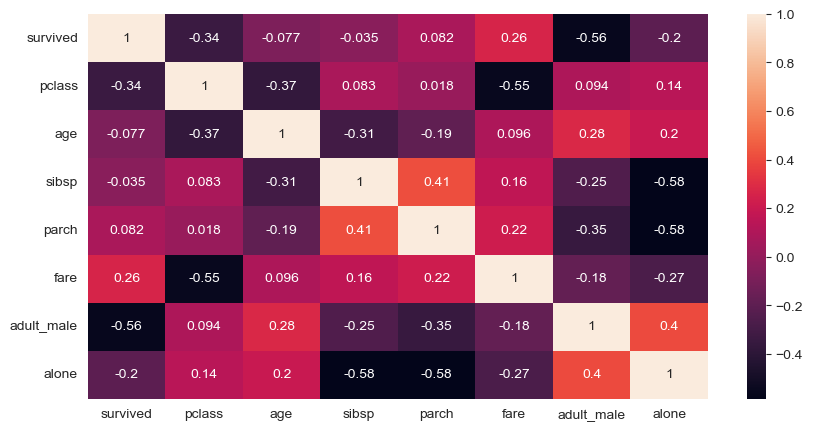

In [23]:
data = sns.load_dataset('titanic')

plt.figure(figsize = (10,5))

sns.heatmap(data.corr(), annot = True)

## Joint Plot
* 산점도와 히스토그램을 결합한 그래프

<Figure size 1000x500 with 0 Axes>

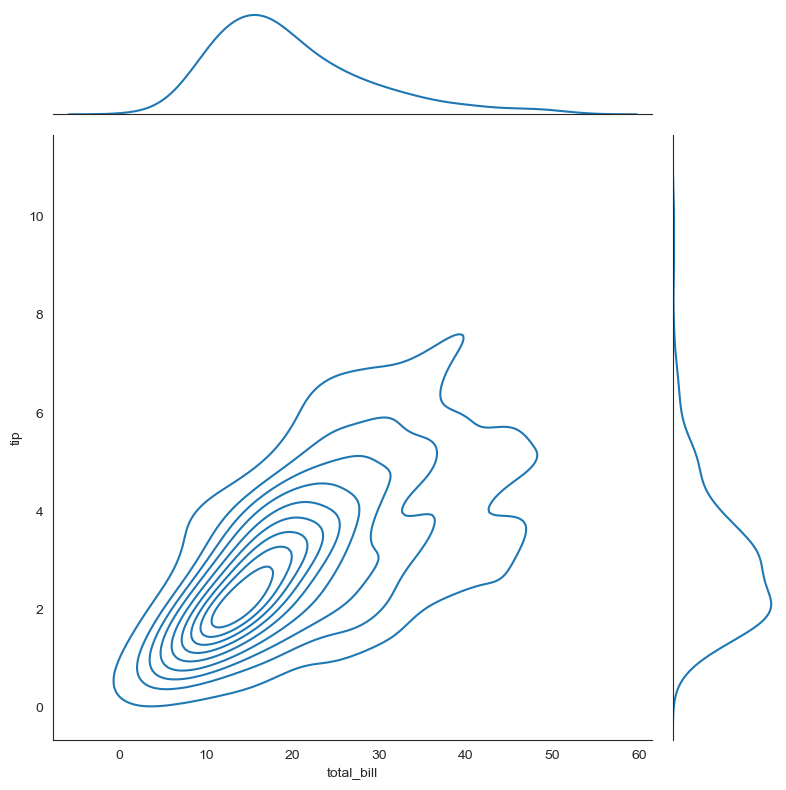

In [24]:
data = sns.load_dataset('tips')

plt.figure(figsize = (10,5))

sns.jointplot(x = 'total_bill', y = 'tip', data = data,
              height = 8, kind = 'kde')

## Facet Grid

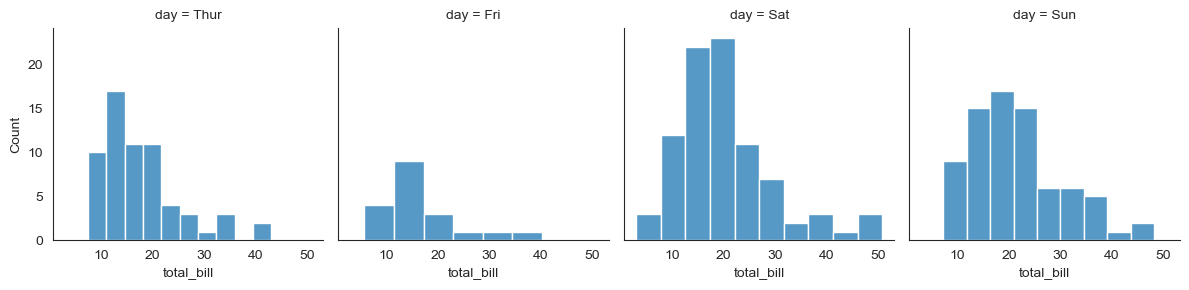

In [30]:
data = sns.load_dataset('tips')

graph = sns.FacetGrid(data, col = 'day')
graph.map(sns.histplot, 'total_bill')

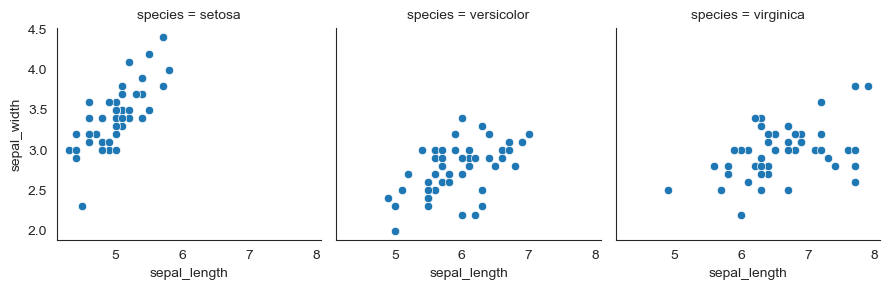

In [31]:
data = sns.load_dataset('iris')

graph = sns.FacetGrid(data, col = 'species')
graph.map(sns.scatterplot, 'sepal_length','sepal_width')

# 3. Plotly
* 상호 작용 가능한 시각화 라이브러리

In [32]:
import plotly.graph_objects as go

## Line Plot

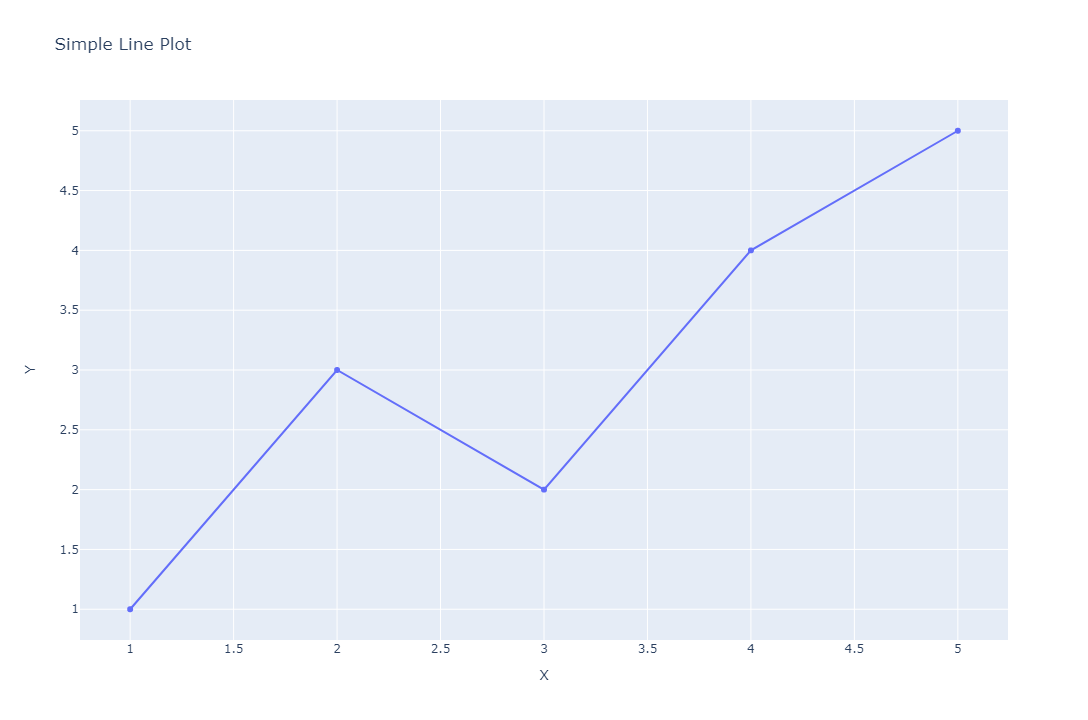

In [34]:
x_data = [1,2,3,4,5]
y_data = [1,3,2,4,5]

fig = go.Figure(data = go.Scatter(x = x_data, y = y_data))

fig.update_layout(title = 'Simple Line Plot',
                  xaxis_title = 'X',
                  yaxis_title = 'Y')

fig.show()

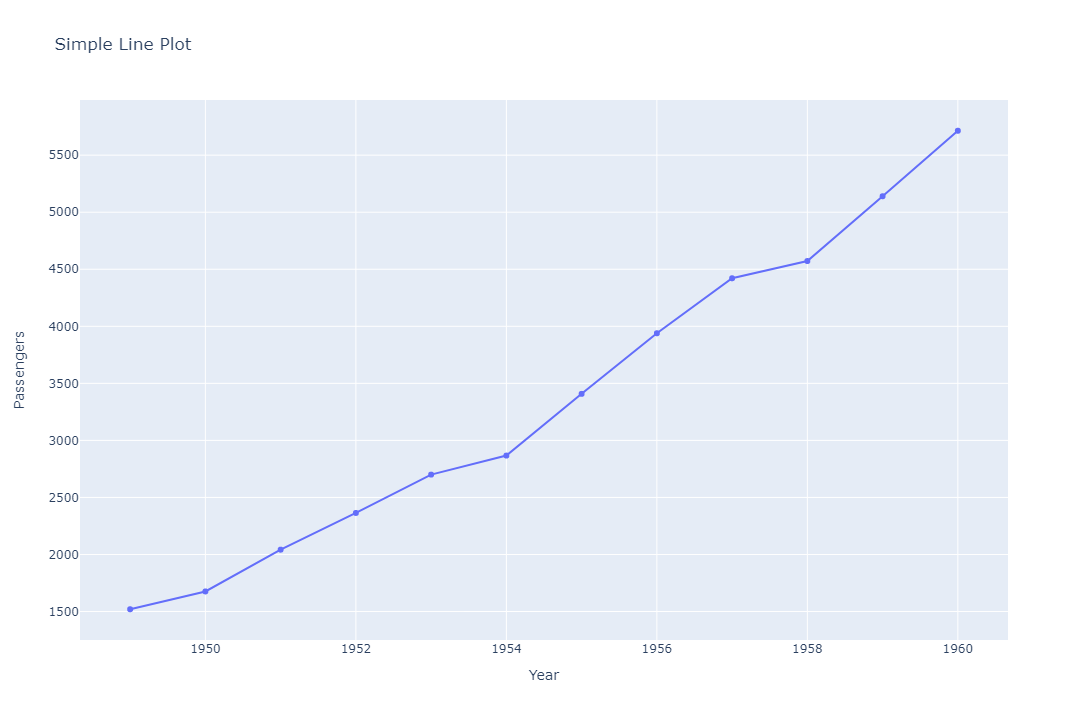

In [35]:
data = sns.load_dataset('flights')
data_group = data.groupby('year').sum()

fig = go.Figure(data = go.Scatter(x = data_group.index, y = data_group['passengers']))

fig.update_layout(title = 'Simple Line Plot',
                  xaxis_title = 'Year',
                  yaxis_title = 'Passengers')

fig.show()

## Scatter Plot

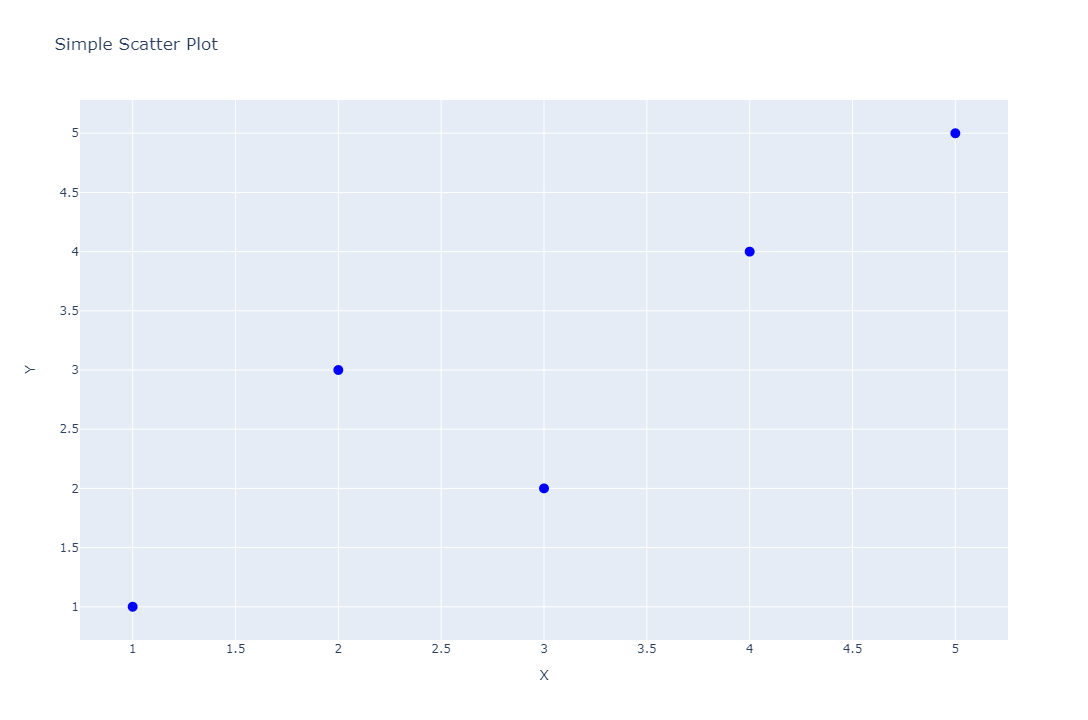

In [37]:
x_data = [1,2,3,4,5]
y_data = [1,3,2,4,5]

fig = go.Figure(data = go.Scatter(x = x_data,
                                  y = y_data,
                                  mode = 'markers',
                                  marker = dict(size = 10,
                                                color = 'blue',
                                                symbol = 'circle')
                                 )
               )

fig.update_layout(title = 'Simple Scatter Plot',
                  xaxis_title = 'X',
                  yaxis_title = 'Y')

fig.show()

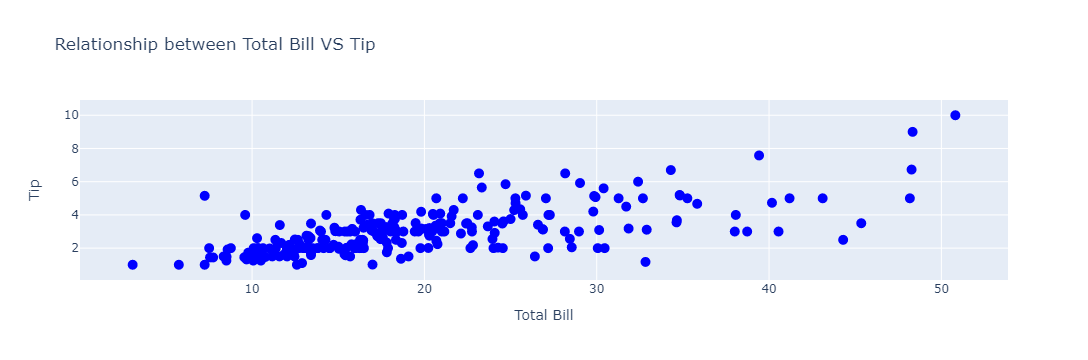

In [38]:
data = sns.load_dataset('tips')
fig = go.Figure(data = go.Scatter(x = data['total_bill'],
                                  y = data['tip'],
                                  mode = 'markers',
                                  marker = dict(size = 10,
                                                color = 'blue',
                                                symbol = 'circle')
                                 )
               )

fig.update_layout(title = 'Relationship between Total Bill VS Tip',
                  xaxis_title = 'Total Bill',
                  yaxis_title = 'Tip')

fig.show()

## Histogram

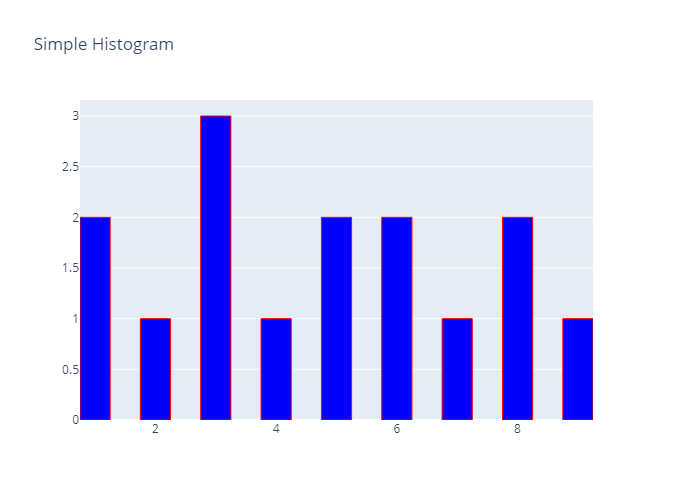

In [39]:
data = [1,1,2,3,3,3,4,5,5,6,6,7,8,8,9]

fig = go.Figure(data = go.Histogram(x = data,
                                    nbinsx = 20,
                                    marker = dict(color = 'blue',
                                                  line = dict(color = 'red',
                                                              width = 1))))

fig.update_layout(title = 'Simple Histogram',
                  width = 1000, height = 500)

fig.show()